In [1]:
import pytorch_lightning as pl

In [2]:
import torch
from torchvision import transforms
from torch.utils.data import DataLoader
from dataset import *

In [4]:

args = {
    "datasets" : [
        "../../Datasets/train_iris_nd_crosssensor_2013", 
        "../../Datasets/train_iris_casia_v4",
        "../../train_iris_inno_a1",
        "../../Datasets/train_iris_nd_0405",
        "../../Datasets/train_iris_utris_v1"
    ],
    "predict_dataset" : "../../Datasets/iris_verification_iitd_01_01",
    "train_transform" : {
        "Resize" : {"size":[225,225]},
        "RandomInvert" : {"p":0.2},
        "Normalize" : {"mean":[0.5], "std":[0.25]},
        "RandomAdjustSharpness"  : {"sharpness_factor":3,"p":0.5},
        "RandomAutocontrast" : {"p":0.5},
        "RandomAffine": {
            "degrees":10, 
            "translate":[0.3, 0.3],
            "scale":[0.8, 2],
            "shear":5,
            "fill":0
        },
        "RandomErasing":{
            "p":0.5, 
            "scale":[0.02, 0.33],
            "ratio":[0.3, 3.3],
            "value":0, 
            "inplace":False
        }
    },
    "val_transform" : {
        "Resize" : {"size":[225,225]},
        "Normalize" : {"mean":[0.5], "std":[0.25]},
    },
    "test_transform" : {
        "Resize" : {"size":[225,225]},
        "Normalize" : {"mean":[0.5], "std":[0.25]},
    },
    "predict_transform" : {
        "Resize" : {"size":[225,225]},
        "Normalize" : {"mean":[0.5], "std":[0.25]},
    }
}

In [5]:
train_transform = transforms.Compose([
    transforms.ConvertImageDtype(torch.float),
    transforms.RandomAffine(**args["train_transform"]["RandomAffine"]),
    transforms.RandomAdjustSharpness(
        **args["train_transform"]["RandomAdjustSharpness"]
    ),
    transforms.RandomAutocontrast(
        **args["train_transform"]["RandomAutocontrast"]
    ),
    transforms.Resize(**args["train_transform"]["Resize"]),
    transforms.RandomInvert(**args["train_transform"]["RandomInvert"]),
    transforms.RandomErasing(**args["train_transform"]["RandomErasing"]),
    transforms.Normalize(**args["train_transform"]["Normalize"]),
])
#val transforms
val_transform=transforms.Compose([
    transforms.Resize(**args["val_transform"]["Resize"]),
    transforms.ConvertImageDtype(torch.float),
    transforms.Normalize(**args["val_transform"]["Normalize"]),
])
#test transforms
test_transform=transforms.Compose([
    transforms.Resize(**args["test_transform"]["Resize"]),
    transforms.ConvertImageDtype(torch.float),
    transforms.Normalize(**args["test_transform"]["Normalize"]),
])
#predict transforms 
predict_transform=transforms.Compose([
    transforms.Resize(**args["predict_transform"]["Resize"]),
    transforms.ConvertImageDtype(torch.float),
    transforms.Normalize(**args["predict_transform"]["Normalize"]),
])

In [110]:
# data
data_loader = IrisDataModule(
    data_dir= args["datasets"],
    predic_data_dir=args["predict_dataset"],
    train_transform=train_transform,
    val_transform=val_transform,
    test_transform=test_transform,
    predict_transform=predict_transform
)

In [111]:
data_loader.setup()

In [112]:
print(len(data_loader.iris_full), data_loader.num_classes)

117858 2540


In [113]:
dl = data_loader.train_dataloader()

In [114]:
input=None
target=None
for x,y in dl:
    input=x
    target=y
    break

In [115]:
target.max()

tensor(2269)

In [116]:
import matplotlib.pyplot as plt

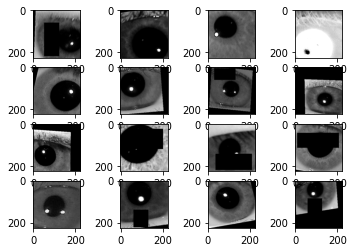

In [117]:
for i in range(16):
    ax = plt.subplot(4, 4, i+1)
    ax.imshow(input[i][0],cmap='gray')

tensor(0.)

In [59]:
import yaml

In [60]:
with open('args.yaml', 'w') as f:
    yaml.dump(args, f)

In [61]:
import json

In [63]:
with open('args.json', 'w') as f:
    json.dump(args, f, indent=4)

In [21]:
emnist = EMNISTDataModule('emnist/')

In [22]:
emnist.prepare_data()

561754112it [01:18, 7111333.86it/s]                                


Extracting emnist/EMNIST/raw/gzip.zip to emnist/EMNIST/raw


In [23]:
emnist.setup()

/usr/local/lib/python3.8/dist-packages/pytorch_lightning/core/datamodule.py:114: LightningDeprecationWarning: DataModule property `train_transforms` was deprecated in v1.5 and will be removed in v1.7.
  rank_zero_deprecation(
/usr/local/lib/python3.8/dist-packages/pytorch_lightning/core/datamodule.py:133: LightningDeprecationWarning: DataModule property `val_transforms` was deprecated in v1.5 and will be removed in v1.7.
  rank_zero_deprecation(
/usr/local/lib/python3.8/dist-packages/pytorch_lightning/core/datamodule.py:152: LightningDeprecationWarning: DataModule property `test_transforms` was deprecated in v1.5 and will be removed in v1.7.
  rank_zero_deprecation(


In [24]:
t_dl = emnist.train_dataloader()

In [25]:
input=None
target=None
for x,y in t_dl:
    input=x
    target=y
    break

In [7]:
ds = IrisVerificationDataset("../../Datasets/iris_verification_nd_0405_01_01", transform=predict_transform)

In [8]:
dl = DataLoader(ds, 30)


In [9]:
for i,l in dl:
    b = (i,l)
    break

In [10]:
ds[0]

(tensor([[[1.3255, 1.2157, 1.1373,  ..., 0.8863, 0.8706, 0.9020],
          [1.2000, 1.2784, 1.2314,  ..., 0.9647, 0.8392, 0.9020],
          [1.2471, 1.2784, 1.2471,  ..., 0.9490, 0.8549, 0.8392],
          ...,
          [1.4824, 1.4353, 1.4824,  ..., 0.3059, 0.1333, 0.0863],
          [1.4039, 1.4353, 1.4824,  ..., 0.2902, 0.2118, 0.1804],
          [1.5294, 1.5608, 1.5137,  ..., 0.2275, 0.2902, 0.1647]]]),
 'iris_nd_0405@00_04214d157')

In [12]:
b[1]

('iris_nd_0405@00_04214d157',
 'iris_nd_0405@00_04214d158',
 'iris_nd_0405@00_04214d159',
 'iris_nd_0405@00_04214d160',
 'iris_nd_0405@00_04214d161',
 'iris_nd_0405@00_04214d162',
 'iris_nd_0405@00_04214d163',
 'iris_nd_0405@00_04214d164',
 'iris_nd_0405@00_04214d165',
 'iris_nd_0405@00_04214d166',
 'iris_nd_0405@00_04214d168',
 'iris_nd_0405@00_04214d169',
 'iris_nd_0405@00_04214d170',
 'iris_nd_0405@00_04214d171',
 'iris_nd_0405@00_04214d172',
 'iris_nd_0405@00_04214d173',
 'iris_nd_0405@00_04214d174',
 'iris_nd_0405@00_04214d175',
 'iris_nd_0405@00_04221d1136',
 'iris_nd_0405@00_04221d1137',
 'iris_nd_0405@00_04221d1138',
 'iris_nd_0405@00_04221d1139',
 'iris_nd_0405@00_04221d1140',
 'iris_nd_0405@00_04221d1141',
 'iris_nd_0405@00_04221d1142',
 'iris_nd_0405@00_04221d1143',
 'iris_nd_0405@00_04221d1144',
 'iris_nd_0405@00_04221d1145',
 'iris_nd_0405@00_04221d1146',
 'iris_nd_0405@00_04221d1149')